# Nivelatorio II: Estadística para la Ciencia de Datos

## Tutorial en Pyhton - Sesión 3

Vamos a explorar cómo Python puede manejar las distribuciones de probabilidad que vimos.

In [152]:
import pandas as pd   ## Libreria para manipular y analizar datos
import matplotlib.pyplot as plt  ## Libreria para visualizar
import seaborn as sns   ## Libreria para visualizar
import numpy as np  ## Libreria para operaciones numéricas
import plotly  ## Libreria para visualizaciones interactivas
import matplotlib.ticker as mtick  ## función para formatear en visualizaciones
from scipy.stats import skew, kurtosis  ## funciones estadísticas
from scipy.stats import randint ## distribución uniforme discreta
from scipy.stats import binom ## distribución binomial
from scipy.stats import poisson ## distribución Poisson
from scipy.stats import norm ## distribución normal

## Distribución uniforme discreta

Dentro de la librería Scipy se cuenta con algunas funciones relevantes (ver https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.randint.html#scipy.stats.randint):

In [153]:
## Para generar un vector aleatorio que sigue dicha distribución:
vector_aleatorio = randint.rvs(low=0,high=10,loc=1,size=30)
vector_aleatorio

array([ 5,  4, 10,  1,  6,  2,  3,  4,  1,  5, 10,  5, 10,  1,  3,  5, 10,
       10,  7,  2,  8,  5,  9,  5, 10,  1,  3,  4,  4,  3])

In [154]:
## Para obtener la probabilidad de que x tome algún valor (función de masa de probabilidad):
# Aquí estamos obteniendo la probabilidad de que x=1, cuando la distribcuión uniforme va de 1 a 10.
randint.pmf(k=1,low=0,high=10,loc=1)

0.1

In [155]:
# Aquí estamos obteniendo la probabilidad acumulada hasta x=5, cuando la distribcuión uniforme va de 1 a 10 (función 
# acumulada de probabilidad)
randint.cdf(k=5,low=0,high=10,loc=1)

0.5

In [156]:
# Aquí estamos obteniendo el valor de x hasta donde se acumula el 60% de la probabilidad, cuando 
# la distribcuión uniforme va de 1 a 10 (función inversa de probabilidad)
randint.ppf(q=0.6,low=0,high=10,loc=1)

6.0

Grafiquemos un conjunto aleatorio de valores que siguen la distribución:

In [157]:
## Creo el vector
vector_aleatorio = randint.rvs(low=0,high=10,loc=1,size=1000)
df = pd.DataFrame(vector_aleatorio, columns = ['Vector'])
df

,Vector
0,8
1,8
2,10
3,2
4,3
...,...
995,4
996,1
997,1
998,7


In [158]:
## Construyo una tabla de frecuencia para revisar cuantas veces se repite cada valor:
tabla_freq=(pd.crosstab(index=df["Vector"],columns="count")).reset_index()
tabla_freq['Freq. Rel.']=tabla_freq['count']/sum(tabla_freq['count'])
tabla_freq

col_0,Vector,count,Freq. Rel.
0,1,93,0.093
1,2,104,0.104
2,3,108,0.108
3,4,112,0.112
4,5,94,0.094
5,6,110,0.110
6,7,84,0.084
7,8,105,0.105
8,9,94,0.094
9,10,96,0.096


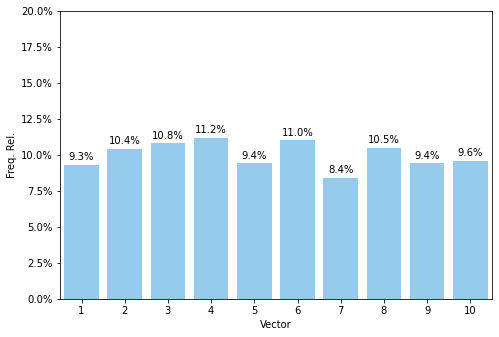

In [159]:
## Construyo la gráfica de la distribución:
fig_sns = plt.figure() 
ax = fig_sns.add_axes([0,0,1,1])
ax=sns.barplot(x=tabla_freq["Vector"],y=tabla_freq["Freq. Rel."]*100, color="lightskyblue") 
ax.bar_label(ax.containers[0], label_type='edge',fmt='%.1f%%',padding=3)  
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=100)) 
ax.set(ylim=(0, 20))
plt.show() 

## Distribución Binomial

Dentro de la librería Scipy se cuenta con algunas funciones relevantes (ver https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom.html#scipy.stats.binom):

In [160]:
## Para generar un vector aleatorio que sigue dicha distribución:
vector_aleatorio = binom.rvs(n=15,p=0.55,size=30)
vector_aleatorio

array([ 9,  5,  7,  7,  9,  9,  9,  7,  4,  5,  8,  5,  9,  6,  7,  7, 11,
        8,  9,  6,  8,  8,  8, 11,  6,  4,  7,  4,  8, 12])

In [161]:
## ¿Cuál es la probabilidad de que 4 sean mujeres en una muestra de 15, donde la proporción de mujeres es 0.55?
#Aquí estamos obteniendo la probabilidad de que x=4:
binom.pmf(k=4,n=15,p=0.55)

0.01913908013759701

In [162]:
## ¿Cuál es la probabilidad de que todas sean mujeres en una muestra de 15, donde la proporción de mujeres es 0.55?
#Aquí estamos obteniendo la probabilidad de que x=15:
binom.pmf(k=15,n=15,p=0.55)

0.00012747949735765552

In [163]:
## Calculemos la probabilidad asociada a cada posible resultado:
df = pd.DataFrame(data={'Resultado':range(0,16),
                        'Probabilidad':binom.pmf(k=range(0,16),n=15,p=0.55)})
df

,Resultado,Probabilidad
0,0,0.000006
1,1,0.000115
2,2,0.000986
3,3,0.005220
4,4,0.019139
5,5,0.051463
6,6,0.104832
7,7,0.164736
8,8,0.201344
9,9,0.191401


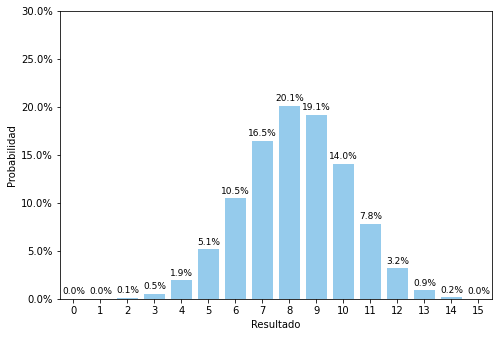

In [164]:
## Construyo la gráfica de la distribución:
fig_sns = plt.figure() 
ax = fig_sns.add_axes([0,0,1,1])
ax=sns.barplot(x=df["Resultado"],y=df["Probabilidad"]*100, color="lightskyblue") 
ax.bar_label(ax.containers[0], label_type='edge',fmt='%.1f%%',padding=3, size=9)  
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=100)) 
ax.set(ylim=(0, 30))
plt.show() 

In [165]:
## ¿Cuál es la media de la distribución?
binom.mean(n=15, p=0.55)

8.25

In [166]:
## Cuál es la probabilidad de que sean seleccionadas menos de 8 mujeres?
#cuanta probabilidad se acumula hasta x=7? 
binom.cdf(k=7,n=15,p=0.55)

0.346496074852906

In [167]:
## Cuál es la probabilidad de que sean seleccionadas más de 4 mujeres?


Hagamos algunos experimentos para entender cómo varía la distribución según sus parámetros:

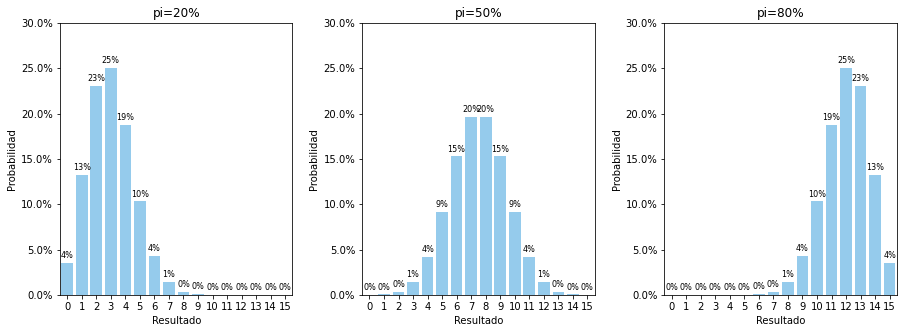

In [168]:
## Variemos pi, dejemos constante n
fig, axs = plt.subplots(ncols=3)
fig.set_size_inches(15, 5)
fig.subplots_adjust(wspace=0.3)

df = pd.DataFrame(data={'Resultado':range(0,16),
                        'Probabilidad':binom.pmf(k=range(0,16),n=15,p=0.2)})

ax1=sns.barplot(x=df["Resultado"],y=df["Probabilidad"]*100, color="lightskyblue",ax=axs[0])
ax1.bar_label(ax1.containers[0], label_type='edge',fmt='%.0f%%',padding=3, size=8)  
ax1.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=100)) 
ax1.set(ylim=(0, 30))
ax1.title.set_text("pi=20%")

df = pd.DataFrame(data={'Resultado':range(0,16),
                        'Probabilidad':binom.pmf(k=range(0,16),n=15,p=0.5)})

ax2=sns.barplot(x=df["Resultado"],y=df["Probabilidad"]*100, color="lightskyblue",ax=axs[1])
ax2.bar_label(ax2.containers[0], label_type='edge',fmt='%.0f%%',padding=3, size=8)  
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=100)) 
ax2.set(ylim=(0, 30))
ax2.title.set_text("pi=50%")

df = pd.DataFrame(data={'Resultado':range(0,16),
                        'Probabilidad':binom.pmf(k=range(0,16),n=15,p=0.8)})

ax3=sns.barplot(x=df["Resultado"],y=df["Probabilidad"]*100, color="lightskyblue",ax=axs[2])
ax3.bar_label(ax3.containers[0], label_type='edge',fmt='%.0f%%',padding=3, size=8)  
ax3.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=100)) 
ax3.set(ylim=(0, 30))
ax3.title.set_text("pi=80%")

plt.show()  

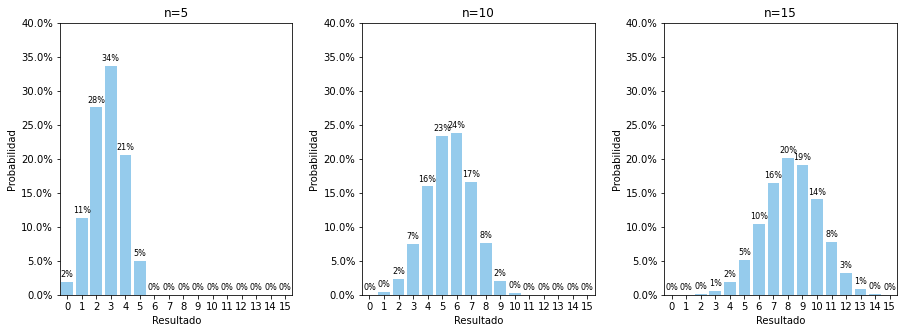

In [169]:
## Variemos n, dejemos constante pi
fig, axs = plt.subplots(ncols=3)
fig.set_size_inches(15, 5)
fig.subplots_adjust(wspace=0.3)

df = pd.DataFrame(data={'Resultado':range(0,16),
                        'Probabilidad':binom.pmf(k=range(0,16),n=5,p=0.55)})

ax1=sns.barplot(x=df["Resultado"],y=df["Probabilidad"]*100, color="lightskyblue",ax=axs[0])
ax1.bar_label(ax1.containers[0], label_type='edge',fmt='%.0f%%',padding=3, size=8)  
ax1.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=100)) 
ax1.set(ylim=(0, 40))
ax1.title.set_text("n=5")

df = pd.DataFrame(data={'Resultado':range(0,16),
                        'Probabilidad':binom.pmf(k=range(0,16),n=10,p=0.55)})

ax2=sns.barplot(x=df["Resultado"],y=df["Probabilidad"]*100, color="lightskyblue",ax=axs[1])
ax2.bar_label(ax2.containers[0], label_type='edge',fmt='%.0f%%',padding=3, size=8)  
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=100)) 
ax2.set(ylim=(0, 40))
ax2.title.set_text("n=10")

df = pd.DataFrame(data={'Resultado':range(0,16),
                        'Probabilidad':binom.pmf(k=range(0,16),n=15,p=0.55)})

ax3=sns.barplot(x=df["Resultado"],y=df["Probabilidad"]*100, color="lightskyblue",ax=axs[2])
ax3.bar_label(ax3.containers[0], label_type='edge',fmt='%.0f%%',padding=3, size=8)  
ax3.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=100)) 
ax3.set(ylim=(0, 40))
ax3.title.set_text("n=15")

plt.show() 

## Distribución de Poisson

Dentro de la librería Scipy se cuenta con algunas funciones relevantes (ver https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.poisson.html#scipy.stats.poisson):

In [170]:
## Para generar un vector aleatorio que sigue dicha distribución:
vector_aleatorio = poisson.rvs(mu=7,size=30)
vector_aleatorio

array([ 3,  8,  6,  9,  7, 12,  7,  5,  9,  8, 11, 10,  7,  4,  9, 10,  5,
        7,  4,  7,  4,  9,  7,  9,  8,  8, 10,  3, 12,  6])

In [171]:
## ¿Cuál es la probabilidad de que se reciban 7 llamadas?
#Aquí estamos obteniendo la probabilidad de que x=7:
poisson.pmf(k=7,mu=7)

0.14900277967433773

In [172]:
## ¿Cuál es la probabilidad de que NO se reciban llamadas?
#Aquí estamos obteniendo la probabilidad de que x=0:
poisson.pmf(k=0,mu=7)

0.0009118819655545162

In [173]:
## Calculemos la probabilidad asociada a cada posible resultado:
df = pd.DataFrame(data={'Resultado':range(0,16),
                        'Probabilidad':poisson.pmf(k=range(0,16),mu=7)})
df

,Resultado,Probabilidad
0,0,0.000912
1,1,0.006383
2,2,0.022341
3,3,0.052129
4,4,0.091226
5,5,0.127717
6,6,0.149003
7,7,0.149003
8,8,0.130377
9,9,0.101405


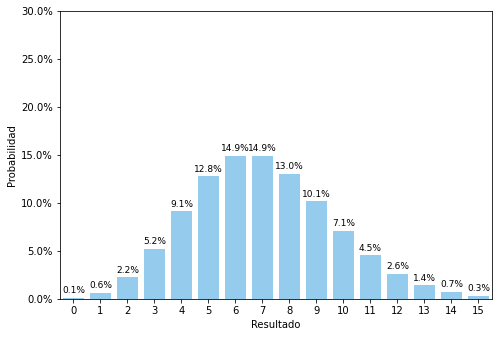

In [174]:
## Construyo la gráfica de la distribución:
fig_sns = plt.figure() 
ax = fig_sns.add_axes([0,0,1,1])
ax=sns.barplot(x=df["Resultado"],y=df["Probabilidad"]*100, color="lightskyblue") 
ax.bar_label(ax.containers[0], label_type='edge',fmt='%.1f%%',padding=3, size=9)  
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=100)) 
ax.set(ylim=(0, 30))
plt.show() 

In [175]:
## cuál es la probabilidad de que se reciban 5 llamadas o menos?
poisson.cdf(k=5,mu=7)

0.3007082761743609

In [176]:
## cuál es la probabilidad que se reciban entre 5 y 9 llamadas?


Miremos cómo cambia la distribución cuando cambia la media:

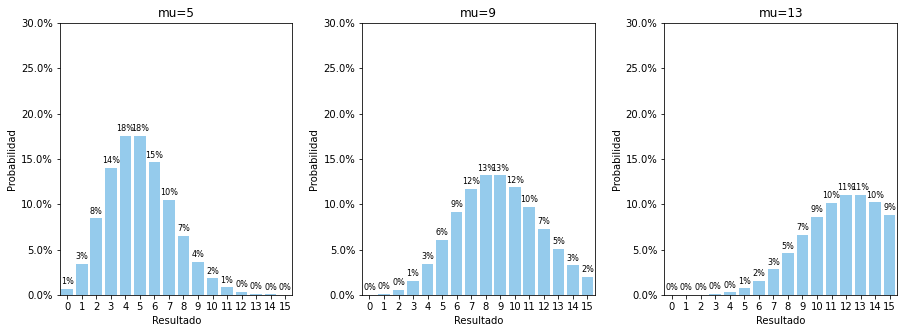

In [177]:
## Variemos mu
fig, axs = plt.subplots(ncols=3)
fig.set_size_inches(15, 5)
fig.subplots_adjust(wspace=0.3)

df = pd.DataFrame(data={'Resultado':range(0,16),
                        'Probabilidad':poisson.pmf(k=range(0,16),mu=5)})

ax1=sns.barplot(x=df["Resultado"],y=df["Probabilidad"]*100, color="lightskyblue",ax=axs[0])
ax1.bar_label(ax1.containers[0], label_type='edge',fmt='%.0f%%',padding=3, size=8)  
ax1.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=100)) 
ax1.set(ylim=(0, 30))
ax1.title.set_text("mu=5")

df = pd.DataFrame(data={'Resultado':range(0,16),
                        'Probabilidad':poisson.pmf(k=range(0,16),mu=9)})

ax2=sns.barplot(x=df["Resultado"],y=df["Probabilidad"]*100, color="lightskyblue",ax=axs[1])
ax2.bar_label(ax2.containers[0], label_type='edge',fmt='%.0f%%',padding=3, size=8)  
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=100)) 
ax2.set(ylim=(0, 30))
ax2.title.set_text("mu=9")

df = pd.DataFrame(data={'Resultado':range(0,16),
                        'Probabilidad':poisson.pmf(k=range(0,16),mu=13)})

ax3=sns.barplot(x=df["Resultado"],y=df["Probabilidad"]*100, color="lightskyblue",ax=axs[2])
ax3.bar_label(ax3.containers[0], label_type='edge',fmt='%.0f%%',padding=3, size=8)  
ax3.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=100)) 
ax3.set(ylim=(0, 30))
ax3.title.set_text("mu=13")

plt.show()  

## Distribución Normal

Dentro de la librería Scipy se cuenta con algunas funciones relevantes (ver https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html):

In [178]:
## Para generar un vector aleatorio que sigue dicha distribución:
vector_aleatorio = norm.rvs(loc=20,scale=2,size=30)
vector_aleatorio

array([17.87044821, 18.3635375 , 20.85337956, 16.17114603, 20.11186452,
       20.63424218, 19.35083612, 21.70231092, 16.80421327, 24.27080817,
       21.80792616, 19.4182858 , 22.66606565, 17.92162299, 16.76792011,
       18.53038774, 18.81035149, 20.3227777 , 18.11054515, 19.44224704,
       19.29385358, 19.74034874, 17.98218865, 18.04160153, 21.79002516,
       18.09513229, 22.69950608, 20.94145723, 21.62319527, 16.75926905])

In [179]:
## ¿cuál es la probabilidad de que el tiempo sea menor o igual que 16 minutos?
norm.cdf(x=16,loc=20,scale=2)

0.022750131948179195

In [180]:
## ¿cuál es la probabilidad de que el tiempo esté entre 16 y 20 minutos?


In [181]:
## ¿Cuál es la probabilidad de que se demoren más de 25 minutos?


Generemos un conjunto de datos aleatorios para realizar algunos ejercicios:

In [182]:
df = pd.DataFrame(data={'Tiempo':norm.rvs(loc=20,scale=2,size=1000)})
df

,Tiempo
0,21.096534
1,20.153710
2,19.925282
3,19.974661
4,19.747381
...,...
995,20.879824
996,21.204576
997,20.706568
998,24.097064


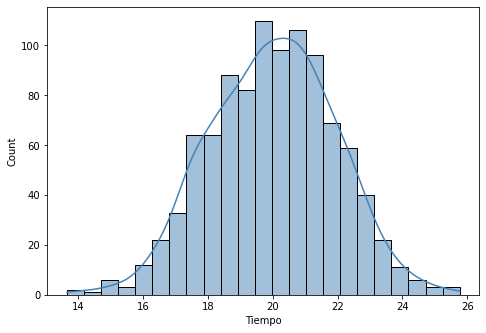

In [183]:
## Cómo se ve esta distribución (que ya sabemos es normal)?
fig_hist = plt.figure() 
ax = fig_hist.add_axes([0,0,1,1])
ax=sns.histplot(x=df['Tiempo'],kde=True,color="steelblue")
plt.show() 

In [184]:
## Hablemos ahora de las reglas empíricas
media_m=np.mean(df['Tiempo'])
desv_m=np.std(df['Tiempo'])

In [185]:
## Teníamos que teóricamente el 68.2% de los datos están entre media +- desv
norm.cdf(x=media_m+desv_m,loc=media_m,scale=desv_m) - norm.cdf(x=media_m-desv_m,loc=media_m,scale=desv_m)

0.6826894921370861

In [186]:
## Teníamos que teóricamente el 95.4% de los datos están entre media +- desv
norm.cdf(x=media_m+2*desv_m,loc=media_m,scale=desv_m) - norm.cdf(x=media_m-2*desv_m,loc=media_m,scale=desv_m)

0.9544997361036416

In [187]:
## Teníamos que teóricamente el 99.7% de los datos están entre media +- desv
norm.cdf(x=media_m+3*desv_m,loc=media_m,scale=desv_m) - norm.cdf(x=media_m-3*desv_m,loc=media_m,scale=desv_m)

0.9973002039367398

Miremos cómo cambia la distribución cuando cambia la media o la desviación estándar:

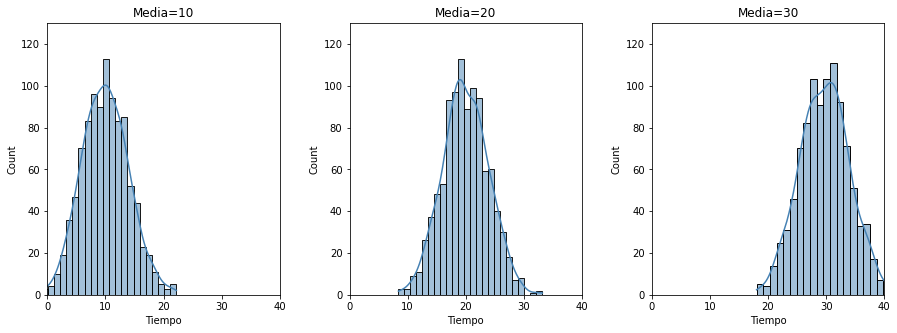

In [188]:
## Variemos la media, y dejemos constante la desviación estándar
fig, axs = plt.subplots(ncols=3)
fig.set_size_inches(15, 5)
fig.subplots_adjust(wspace=0.3)

df = pd.DataFrame(data={'Tiempo':norm.rvs(loc=10,scale=4,size=1000)})

ax2=sns.histplot(x=df['Tiempo'],kde=True,color="steelblue", ax=axs[0]) 
ax2.set(xlim=(0, 40))
ax2.set(ylim=(0, 130))
ax2.title.set_text("Media=10")

df = pd.DataFrame(data={'Tiempo':norm.rvs(loc=20,scale=4,size=1000)})

ax2=sns.histplot(x=df['Tiempo'],kde=True,color="steelblue", ax=axs[1]) 
ax2.set(xlim=(0, 40))
ax2.set(ylim=(0, 130))
ax2.title.set_text("Media=20")

df = pd.DataFrame(data={'Tiempo':norm.rvs(loc=30,scale=4,size=1000)})

ax3=sns.histplot(x=df['Tiempo'],kde=True,color="steelblue", ax=axs[2]) 
ax3.set(xlim=(0, 40))
ax3.set(ylim=(0, 130))
ax3.title.set_text("Media=30")

plt.show()  

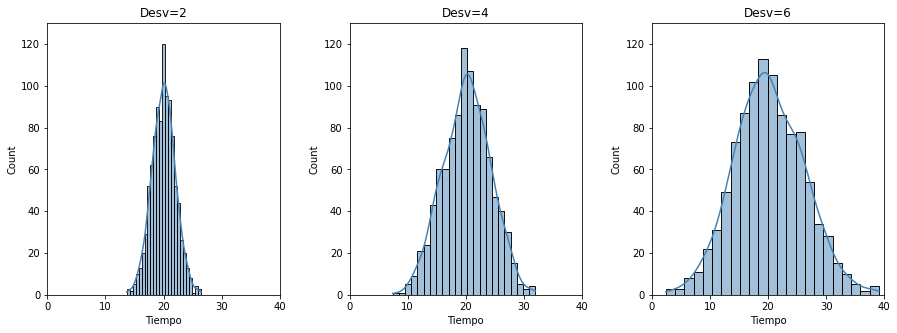

In [189]:
## Variemos la desviación estándar, y dejemos constante la media
fig, axs = plt.subplots(ncols=3)
fig.set_size_inches(15, 5)
fig.subplots_adjust(wspace=0.3)

df = pd.DataFrame(data={'Tiempo':norm.rvs(loc=20,scale=2,size=1000)})

ax2=sns.histplot(x=df['Tiempo'],kde=True,color="steelblue", ax=axs[0]) 
ax2.set(xlim=(0, 40))
ax2.set(ylim=(0, 130))
ax2.title.set_text("Desv=2")

df = pd.DataFrame(data={'Tiempo':norm.rvs(loc=20,scale=4,size=1000)})

ax2=sns.histplot(x=df['Tiempo'],kde=True,color="steelblue", ax=axs[1]) 
ax2.set(xlim=(0, 40))
ax2.set(ylim=(0, 130))
ax2.title.set_text("Desv=4")

df = pd.DataFrame(data={'Tiempo':norm.rvs(loc=20,scale=6,size=1000)})

ax3=sns.histplot(x=df['Tiempo'],kde=True,color="steelblue", ax=axs[2]) 
ax3.set(xlim=(0, 40))
ax3.set(ylim=(0, 130))
ax3.title.set_text("Desv=6")

plt.show() 